# Heart disease Prediction 


## 1. Problem Definition
Binary Classification
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data


The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.


However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary


The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.


In [4]:
# Import Libraries we will use 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Model libraries - we will try 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
# import evaluation metrics 
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

## Load data

In [7]:
df = pd.read_csv("../data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# description 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
#info - 303 non null cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA
Qs to address:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [15]:
# pretty even distribution !!!
df["target"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [14]:
# no nulls 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

NOTE :for catagorical features that are numerical, convert to string first then do dummy,\
eg. df1 = pd.get_dummies(df.astype(str))

<AxesSubplot:xlabel='target', ylabel='count'>

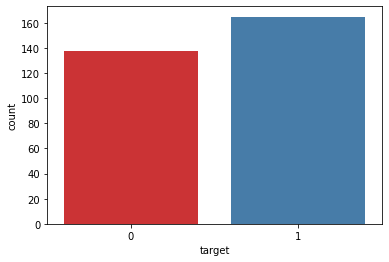

In [32]:
# plot target cols
sns.countplot(x="target",data=df,palette="Set1")

In [35]:
# baseline value of heart disease
df["target"].value_counts()[1]/len(df) * 100

54.45544554455446

**baseline is 54% of patients have heart disease**

<Figure size 864x432 with 0 Axes>

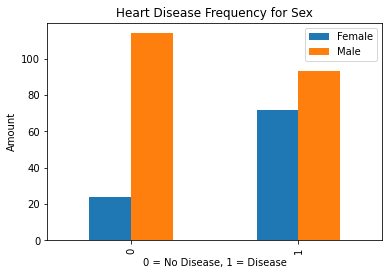

In [39]:
# compare target with sex column 
# use crosstab to compare 2 cols
plt.figure(figsize=(12,6))
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

<AxesSubplot:xlabel='sex', ylabel='count'>

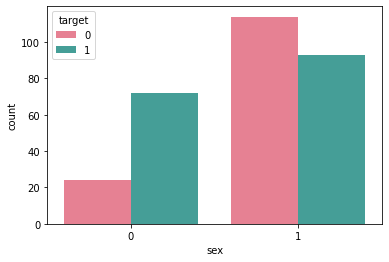

In [69]:
# check distribution of male and females
# more than double the males than females
sns.countplot(x="sex",data=df,hue="target",palette="husl")


See More % of men dont have heart disease. But more percentage of females have heart disease.


### Compare max heart rate(thalach) vs age


<AxesSubplot:xlabel='age', ylabel='thalach'>

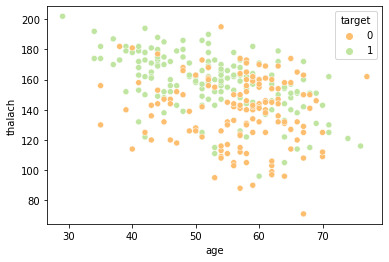

In [65]:
sns.scatterplot(x="age",y="thalach",data=df,hue="target",palette="Spectral")

Younger the person the higher the max hear rate kinda. Most participants seems older though and follow normal distribution 

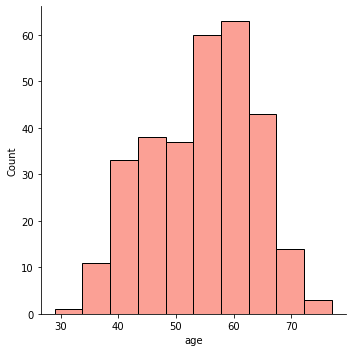

In [71]:
# check age distribution
sns.displot(df["age"],bins=10,color="salmon")

#### heart disease  vs chest pain type
`cp` vs the target

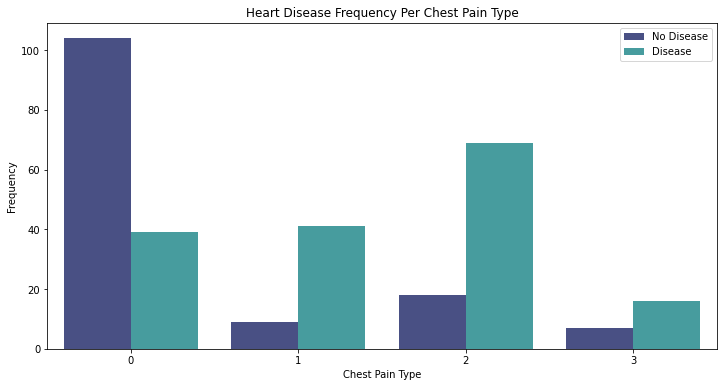

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x="cp",data=df,palette="mako",hue="target")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
 
- See 0 has higher ratio with no heart diseas
- Whereas other you have higher chance of heart disease.


#### Correlations

<AxesSubplot:>

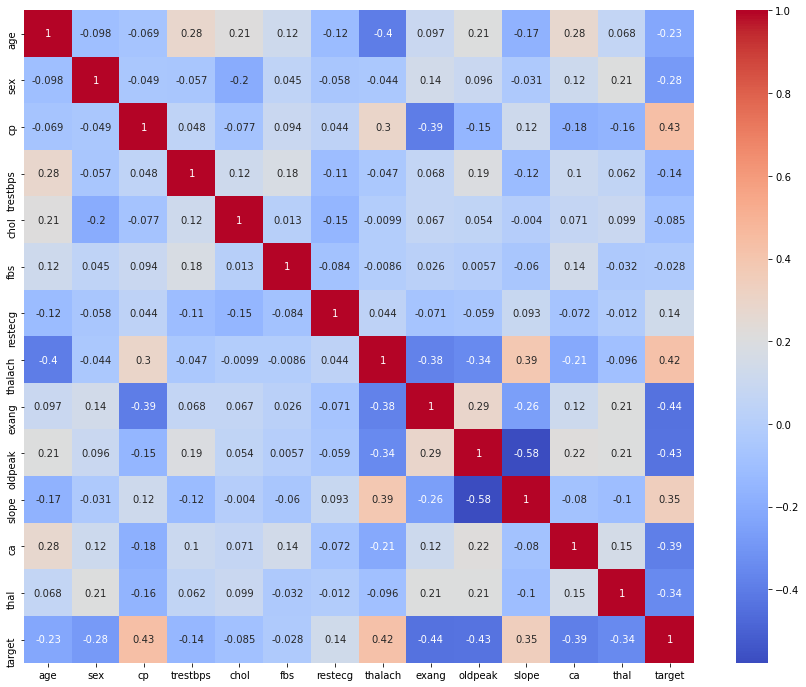

In [80]:
# create heatmap of all corelations 
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

<AxesSubplot:>

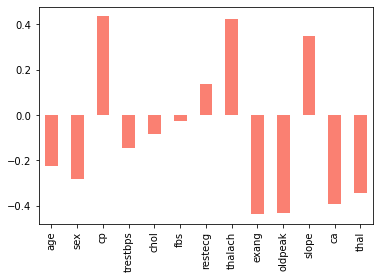

In [86]:
# plot correlation with target column
# looks as if cp and thalach and slope are most correlated
df.corr()["target"][:-1].plot(kind="bar",color="salmon")

<AxesSubplot:xlabel='slope', ylabel='count'>

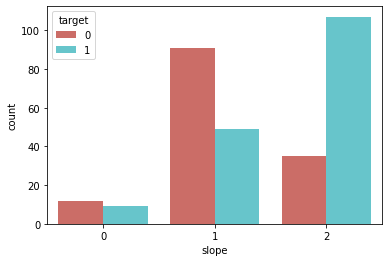

In [92]:
#check out slope with target
sns.countplot(x="slope",data=df,hue="target",palette="hls")

2 shows high chance of having heart disease

<AxesSubplot:xlabel='exang', ylabel='count'>

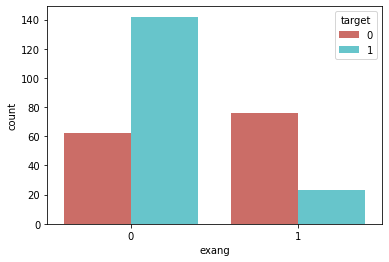

In [95]:
#check out exang with target
sns.countplot(x="exang",data=df,hue="target",palette="hls")

Shows opposite results with exang(exersize induced angia).
0 - more people have heart disease
1- more people dont have heart disease

### Data already in numerical format and also no nulls so can skip Data Preprocessing and move onto modelling

# Modeling phase

In [83]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
# Setup X and y variables 
X = df.drop("target",axis=1)
y = df["target"]

In [99]:
#train test split data. 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Try out with differnet models 
These were found using the sckit-learn cheatsheet map\
Put models into map and create function to get score from each 

In [136]:
#models dictionary 
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}
#create function to accept models dict and fit and score model
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models items
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [137]:
# pass through function and display accuracy of each
model_scores = fit_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/Anmol/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.7049180327868853}

<AxesSubplot:>

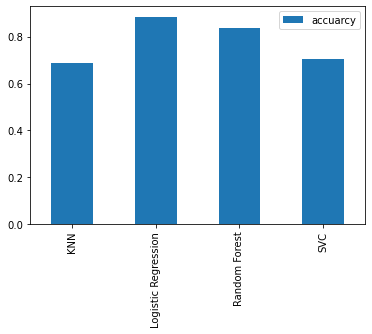

In [140]:
# plot out the results
pd.DataFrame(model_scores,index=["accuarcy"]).T.plot(kind="bar")

### looks like logistic regression and random forrest performs best .
#### But lets check other metrics and tune hyperparamters 
#### Cross-validate data as well
### Steps 
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

#### KNN tune by hand by changing _neighbours from 1-19


In [154]:
# plot out error rate to see best knn value to use 
# ELBOW method
err_rate = []
test_scores = []
train_scores=[]
for i in range(1,20):
    # fit and predict 
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    i_preds = knn_i.predict(X_test)
    # append err rate 
    err_rate.append(np.mean(i_preds != y_test))
    # get test score
    test_scores.append(knn_i.score(X_test,y_test))
    # Update the training scores
    train_scores.append(knn_i.score(X_train, y_train))

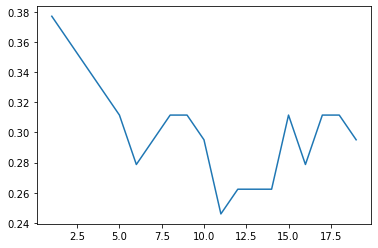

In [160]:
plt.plot(range(1,20),err_rate)

Seems err rate at 11 drops the most thus is the best 

Maximum KNN score on the test data: 75.41%


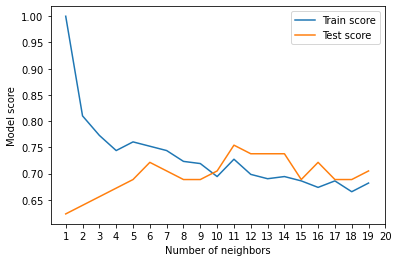

In [159]:
plt.plot(range(1,20), train_scores, label="Train score")
plt.plot(range(1,20), test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Best score as shown also !!! But still worse than other models so will disregard


#### logistic,SVC and Random Forrests 
    # Perform Randomized Search First
    # Then peform grid search 

In [161]:
# Setup different grids for each model
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
#  Different SVC hyperparameters
svc_grid= {"C":[.1,1,10,100,100],"gamma":[1,.1,.01,.001,.0001]}


##### logistic regression 

In [167]:
#setup random seed 
np.random.seed(42)
# RandomSearch with 20 iterations and 5 way cross-validation
log_ran = RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                            cv=5,n_iter=20,verbose=True)
# fit to data
log_ran.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [168]:
# best params obtained 
log_ran.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [169]:
# lets redo score and see 
log_ran.score(X_test,y_test)

0.8852459016393442

Not much imporovement

#### RandomForrest 

In [172]:
#setup random seed 
np.random.seed(42)
# RandomSearch with 20 iterations and 5 way cross-validation
rf_ran = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                            cv=5,n_iter=20,verbose=2)
# fit to data
rf_ran.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.8s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.7s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5, total=   0.4s
[CV] n_estimators=310, min_samples_split=2,

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.5s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.5s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [175]:
# best params!!
rf_ran.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [176]:
# get score 
rf_ran.score(X_test,y_test)

0.8688524590163934

Defs improved a little !!!

In [181]:
#setup random seed 
np.random.seed(42)
# RandomSearch with 20 iterations and 5 way cross-validation
svc_ran = RandomizedSearchCV(SVC(),
                             param_distributions=svc_grid,
                            cv=5,n_iter=20,verbose=2)
# fit to data
svc_ran.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] gamma=0.001, C=1 ................................................
[CV] ................................. gamma=0.001, C=1, total=   0.0s
[CV] gamma=0.001, C=1 ................................................
[CV] ................................. gamma=0.001, C=1, total=   0.0s
[CV] gamma=0.001, C=1 ................................................
[CV] ................................. gamma=0.001, C=1, total=   0.0s
[CV] gamma=0.001, C=1 ................................................
[CV] ................................. gamma=0.001, C=1, total=   0.0s
[CV] gamma=0.001, C=1 ................................................
[CV] ................................. gamma=0.001, C=1, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.0001, C=1 ...............................................
[CV] .

[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   verbose=2)

In [182]:
# best params 
svc_ran.best_estimator_

SVC(C=100, gamma=0.0001)

In [185]:
svc_ran.score(X_test,y_test)


0.8360655737704918

Big improvement from before 

#### DO GridCVSearchs looking at smaller range of values obtained from randomSearch to exhaustively search

In [186]:
# setup grids
log_param_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rf_param_grid = {"n_estimators": np.arange(100, 500, 50),
           "max_depth": [None, 3],
           "min_samples_split": np.arange(2, 8, 2),
           "min_samples_leaf": np.arange(17, 20, 2)}
svc_param_grid = svc_grid= {"C":[.1,1,10,100,100],
                            "gamma":[1,.1,.01,.001,.0001]}

##### logistic regression

In [187]:
#Grid search 
# default cv =5
log_grid = GridSearchCV(LogisticRegression(),log_param_grid,verbose=2)
#train data 
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.004832930238571752, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, solver=liblinear ........................
[CV] ......... C=0.004832930238571752, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, solver=liblinear ........................
[CV] ......... C=0.012742749857031334, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, solver=liblinear ........................
[CV] ......... C=0.012742749857031334, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, solver=liblinear ........................
[CV] ......... C=0.012742749857031334, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, solver=liblinear ........................
[CV] ......... C=0.012742749857031334, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, solver=liblinear ........................
[CV] ......... C=0.012742749857031334, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, solver=liblinear .........................
[CV] .

[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [189]:
# best param same as before 
log_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [190]:
# score
log_grid.score(X_test,y_test)

0.8852459016393442

Same as before not much change

#### Random forrest 

In [191]:
#Grid search 
# default cv =5
rf_grid = GridSearchCV(RandomForestClassifier(),rf_param_grid,verbose=2)
#train data 
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None

[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=150 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.3s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=None

[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=300 
[CV]  max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=None

[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=300 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=300 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350, total=   0.5s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350, total=   0.5s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=350, total=   0.5s
[CV] max_depth=None

[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=350, total=   0.5s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=None

[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s
[CV] max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450 
[CV]  max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.7s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, min_samples_l

[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.3s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, min_samples_leaf=17, min_samples_s

[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=200 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.5s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250 
[CV]  max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=250, total=   0.4s
[CV] max_depth=3, min_samples_leaf=17, min_samples_s

[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=350 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=350, total=   0.5s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=350 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=350, total=   0.5s
[CV] max_depth=3, min_samples_leaf=19, min_samples_s

[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=350, total=   0.5s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_s

[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=450 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s
[CV] max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=450 
[CV]  max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=450, total=   0.6s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.3min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([17, 19]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             verbose=2)

In [192]:
rf_grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 17,
 'min_samples_split': 2,
 'n_estimators': 250}

In [193]:
rf_grid.score(X_test,y_test)

0.8688524590163934

Pretty much same as before 

#### SVC

In [195]:
#Grid search 
# default cv =5
svc_grid = GridSearchCV(SVC(),svc_param_grid,verbose=2)
#train data 
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [197]:
svc_grid.score(X_test,y_test)

0.8360655737704918

Same as Before 

# Logistic regression has  best model results. Thus we will use this.

### Evaluate logistic model further !

In [198]:
# make predictions on test set 
y_preds = log_grid.predict(X_test)

In [199]:
# ROC Curve
from sklearn.metrics import plot_roc_curve

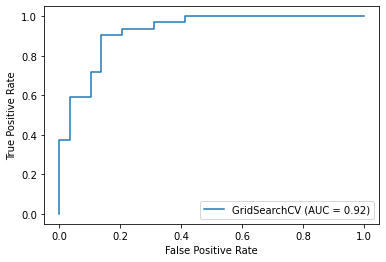

In [200]:
# plot ROC curve 
plot_roc_curve(log_grid,X_test,y_test)

AUC .92 so not bad. Gives us true posotive rate vs false postive rate

In [201]:
# confusion matric 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [202]:
# plot this confusion matrix
from sklearn.metrics import plot_confusion_matrix


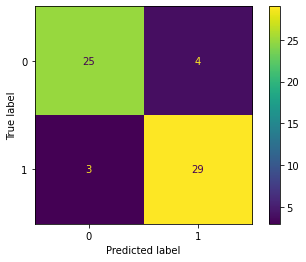

In [203]:
plot_confusion_matrix(log_grid,X_test,y_test)

Same result but looks nicer 

In [204]:
# classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Since its disease we want less FNs, thus focus more on recall!!!**

.89 f1-score decent.
But this is calculated with 1 test set and no cross validation.
#### Score with cross validation

In [207]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [209]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc.mean()

0.8479781420765027

Accuaracy down to .84 from .88

In [218]:
# precision 
cv_prec = cross_val_score(clf,X,y,scoring="precision",cv=5)
cv_prec.mean()

0.8215873015873015

In [213]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall.mean()

0.9272727272727274

In [215]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1.mean()

0.8705403543192143

REcall 92% which is pretty good

## Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"\
     # the `coef_` attribute is the coefficient of the features in the decision function.

In [220]:
# fit clf from above 
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [221]:
# get co_effs - correlation with each feaeture for model 
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [241]:
# see corelatuon more clearly 
features_list = list(zip((df.columns),list(clf.coef_[0])))

In [242]:
features_list

[('age', 0.003699223396114675),
 ('sex', -0.9042409779785583),
 ('cp', 0.6747282348693419),
 ('trestbps', -0.011613398123390507),
 ('chol', -0.0017036431858934173),
 ('fbs', 0.0478768694057663),
 ('restecg', 0.33490207838133623),
 ('thalach', 0.024729380915946855),
 ('exang', -0.6312041363430085),
 ('oldpeak', -0.5759099636629296),
 ('slope', 0.47095166489539353),
 ('ca', -0.6516534354909507),
 ('thal', -0.6998421698316164)]

In [243]:
# see corelation as a dataframe
model_corr = pd.DataFrame(clf.coef_[0],index=list(df.columns)[:-1])
model_corr

,0
age,0.003699
sex,-0.904241
cp,0.674728
trestbps,-0.011613
chol,-0.001704
fbs,0.047877
restecg,0.334902
thalach,0.024729
exang,-0.631204
oldpeak,-0.575910


In [237]:
list(df.columns)[:-1]

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

<AxesSubplot:title={'center':'feature importance'}>

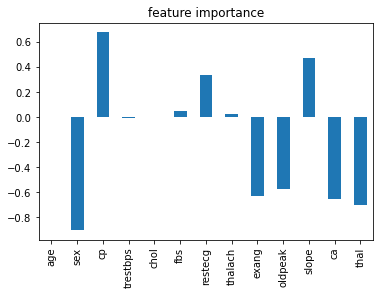

In [246]:
model_corr.plot(kind="bar",title="feature importance",legend=False)

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values. 

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [247]:
# check sex agaib 
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You  can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

In [248]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see `slope` is the "slope of the peak exercise ST segment" where:
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
    
According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

When you look at the contrast (`pd.crosstab(df["slope"], df["target"]`) it is. As `slope` goes up, so does `target`. 

Some features have far less importance like chol,fbs thalach. THey can probably removed from the model 

In [250]:
# save model 
import pickle 


In [251]:
pickle.dump(clf,open("heart_disease_model.pkl","wb"))